<a href="https://colab.research.google.com/github/Davioliveira1305/LBI/blob/main/LBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBs Utilizadas

In [19]:
# Libs Necessárias
import graphviz as gp
import matplotlib.pyplot as plt
from IPython.display import Image
import itertools
from itertools import product

# Definição das Variáveis do Problema

In [2]:
# Variáveis Globais do Problema
global var, lista_pesos, lista_pesos_restr, capacidade
# QTDE de variáveis do problema
var = int(input('Diga-me quantas variavéis de decisão possui seu problema da mochila 0-1: '))
lista_pesos = [] # Pesos das variáveis na função objetivo
for i in range(var):
  peso = int(input(f'Informe o peso da variável x{i + 1} na função objetivo: '))
  lista_pesos.append(peso)
lista_pesos_restr = [] # Pesos das variáveis na restrição
for i in range(var):
  peso_restr = int(input(f'Informe o peso da variável x{i + 1} na restrição: '))
  lista_pesos_restr.append(peso_restr)
# Capacidade da Mochila
capacidade = int(input('Informe a capacidade da mochila: '))

Diga-me quantas variavéis de decisão possui seu problema da mochila 0-1: 4
Informe o peso da variável x1 na função objetivo: 10
Informe o peso da variável x2 na função objetivo: 6
Informe o peso da variável x3 na função objetivo: 12
Informe o peso da variável x4 na função objetivo: 7
Informe o peso da variável x1 na restrição: 4
Informe o peso da variável x2 na restrição: 2
Informe o peso da variável x3 na restrição: 6
Informe o peso da variável x4 na restrição: 3
Informe a capacidade da mochila: 10


# Função de Transição

In [34]:
# Função de transição entre um estado e outro.
def funcao_tran(estado, xi, i):
  valor_estado = estado + xi * lista_pesos_restr[i]
  if valor_estado <= capacidade: return True, valor_estado
  return False, 0


# Classe que Define um Nó do Grafo

In [35]:
# Objeto Nó do Grafo
class No:
  def __init__(self, estado, id):
    self.estado = estado  # Estado
    self.id = id          # Identificação
    self.pai = None       # Pai do Nó
  def __str__(self):
    return f'{self.estado}'
  def __repr__(self) -> str:
    return f'{self.estado}'

# Algoritmo para a Visualização do Diagrama de Decisão

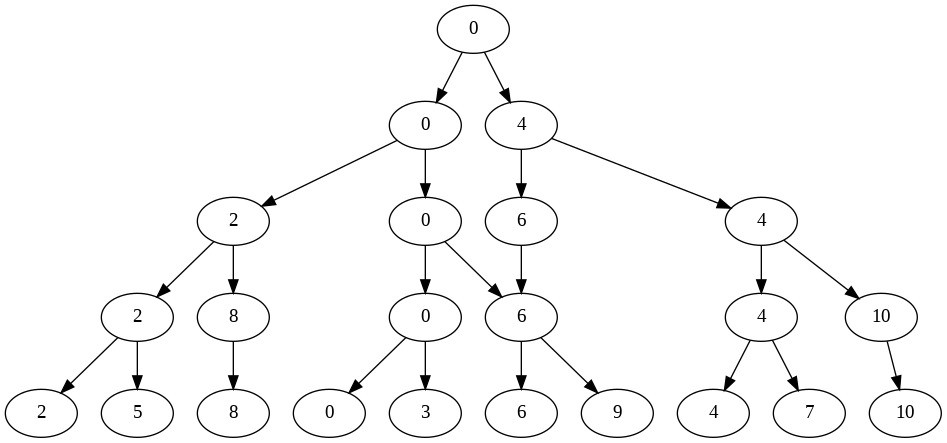

In [38]:
# Algoritmo propriamente dito
grafo = gp.Digraph(comment = 'DD') # Objeto Diagrama de Decisão
raiz = No(0, '0')                  # Raiz do grafo
grafo.node('0')
Lista_camadas = [[raiz]]           # Lista de Camadas do Diagrama
dominio = [0, 1]
lista_edges = []                   # Domínio das variáveis
id = 1
for i in range(0, var):
  lj = list()
  ls = list()
  #
  for j, xi in product(Lista_camadas[i], dominio):
      estado, valor_estado = funcao_tran(j.estado, xi, i)
      if estado:
        #!
        if valor_estado not in ls:
          node = No(valor_estado, str(id))
          node.pai = j
          grafo.node(name=str(id), label=str(valor_estado))
          grafo.edge(j.id, node.id)
          lj.append(node)
          ls.append(valor_estado)
          id += 1
          continue
        index = ls.index(valor_estado)
        grafo.edge(j.id, lj[index].id)
  Lista_camadas.append(lj)

# Plot do Diagrama de Decisão
filename = grafo.render(filename = 'graph', format = 'png', view = False)
Image(filename)
